# House Prices - Advanced Regression Techniques ❤️‍🔥
Dataset Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
<br><br>
Stanley Nathanael Wijaya - 2702217125

## Task Description

You are a data scientist tasked with developing a predictive model for house prices 
<br><br>
(https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
<br>
<ul>
    <li>Your objective is to build a linear regression model that accurately predicts the sale price of houses based on various features.</li>
    <li>Split the dataset into a training set and a testing set to evaluate your model's performance (70:30).</li>
    <li>Develop a linear regression model using your selected features.</li>
    <li>Evaluate your model using appropriate metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared.</li>
    <li>Interpret the results and provide insights into the model's performance.</li>
</ul>

## Import Library

In [427]:
import numpy as np 
import pandas as pd
from math import sqrt
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [428]:
plt.style.use(style='fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

# Exploratory Data Analysis

In [429]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [430]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [431]:
print('No. of records in train dataset: ', len(train.index))
print('No. of columns in train dataset: ', len(train.columns))
print('No. of records in test dataset: ', len(test.index))
print('No. of columns in test dataset: ', len(test.columns))

No. of records in train dataset:  1460
No. of columns in train dataset:  81
No. of records in test dataset:  1459
No. of columns in test dataset:  80


In [432]:
# check the missing values
print ('Total missing values in train set', sum(train.isna().sum()))
print ('Total missing values in test set', sum(test.isna().sum()))

Total missing values in train set 7829
Total missing values in test set 7878


In [433]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The above line code shows that the average sale price of a house is close to 180,000 with most of the values falling within the 130,000 to 215,000 range. Next step is to show the relationship between the columns to examine the correlations between the features and the target.

In [434]:
numeric_cols = train.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('The Most Correlated Features with SalePrice:'), print (corr['SalePrice'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with SalePrice:'), print (corr['SalePrice'].sort_values(ascending = False)[-5:])

The Most Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

The Most Uncorrelated Features with SalePrice:
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


(None, None)

The most correlated features to sale price were the overall quality score (79%), above-ground living area (71%), garage area (64%), and number-of-car garage (62%). Next step is to plot each variable individually against SalePrice in a scatter plot to check outliers as outliers can affect the regression model by pulling the estimated regression line further away from the true population regression line.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14808\2702621160.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="Blues_r")


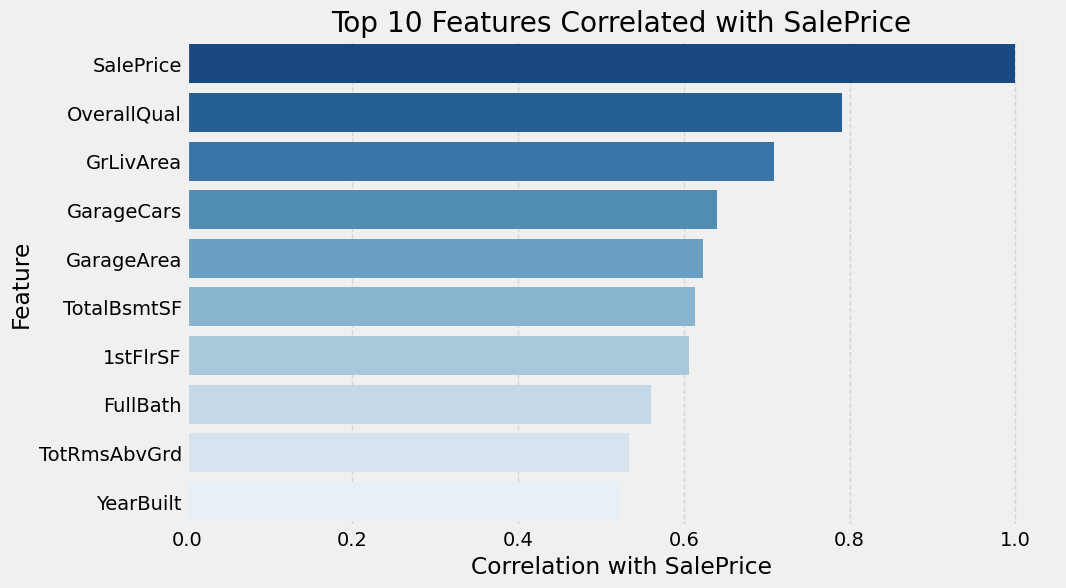

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14808\2702621160.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_corr_features.values, y=low_corr_features.index, palette="Reds_r")


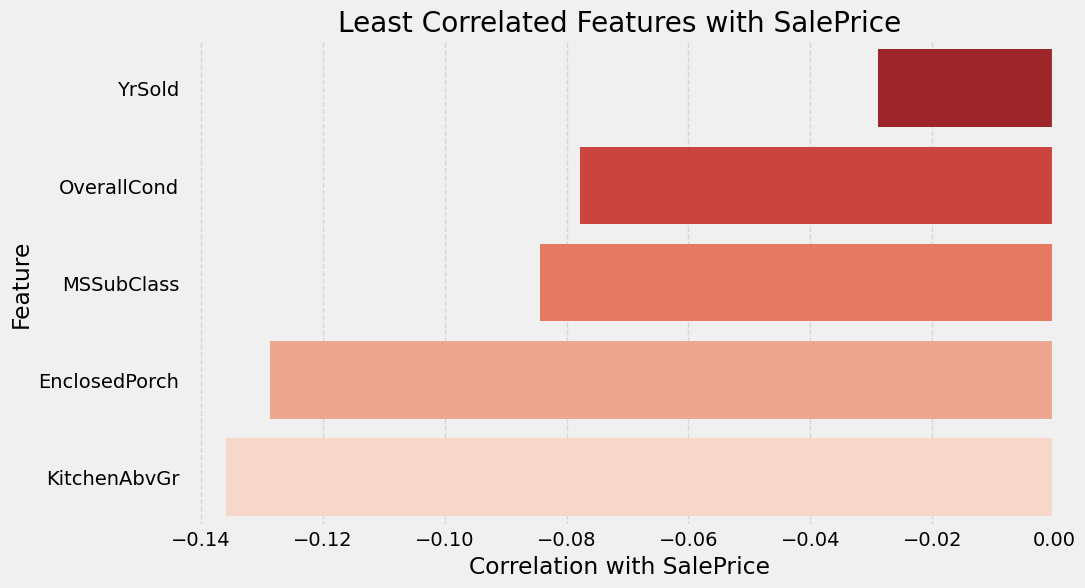

In [435]:
numeric_cols = train.select_dtypes(include=[np.number])

corr = numeric_cols.corr()

top_corr_features = corr['SalePrice'].sort_values(ascending=False)[:10]

low_corr_features = corr['SalePrice'].sort_values(ascending=False)[-5:]

# visualization

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="Blues_r")
plt.xlabel("Correlation with SalePrice")
plt.ylabel("Feature")
plt.title("Top 10 Features Correlated with SalePrice")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=low_corr_features.values, y=low_corr_features.index, palette="Reds_r")
plt.xlabel("Correlation with SalePrice")
plt.ylabel("Feature")
plt.title("Least Correlated Features with SalePrice")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Text(0.5, 0, 'GrLivArea (Above grade "ground" living area square feet)')

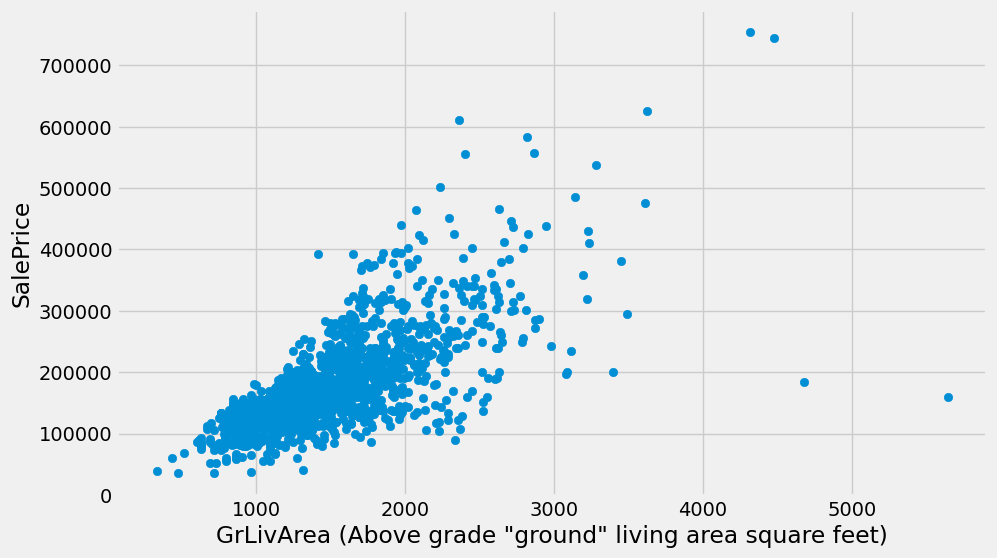

In [436]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea (Above grade "ground" living area square feet)')

At first glance, there are increases in living area correspond to increases in price, with few outliers.

Text(0.5, 0, 'GarageArea')

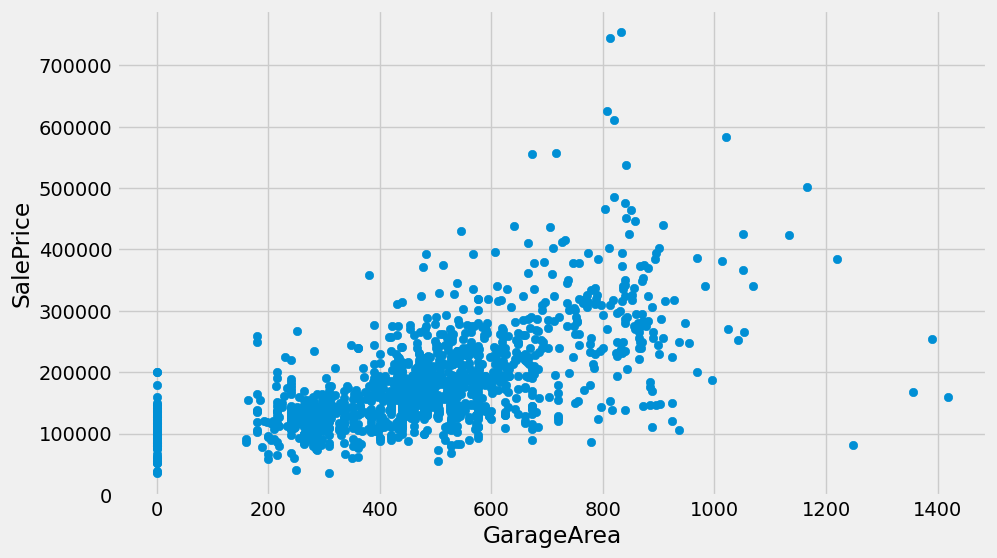

In [437]:
plt.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')

So there are many homes with 0 for GarageArea and there are a few outliers as well!

# Data Preprocessing

In this section the data is prepared (transformed, encoded, etc) to make it suitable for a building and training machine learning model. I chose to manually remove certain extreme outliers in the dataset to produce a better fit.

In [438]:
train = train[train['GrLivArea'] < 4500]

In [439]:
train = train[train['GarageArea'] < 1200]

In [440]:
# drop columns with percentage of missing values > 80%
train_percentage = train.isnull().sum() / train.shape[0]
print (train_percentage[train_percentage > 0.80])
train = train.drop(train_percentage[train_percentage > 0.80].index, axis = 1)

Alley          0.937414
PoolQC         0.995873
Fence          0.806740
MiscFeature    0.963549
dtype: float64


In [441]:
# do the same with test data
test_percentage = test.isnull().sum() / test.shape[0]
print (test_percentage[test_percentage > 0.80])
test = test.drop(test_percentage[test_percentage > 0.80].index, axis = 1)

Alley          0.926662
PoolQC         0.997944
Fence          0.801234
MiscFeature    0.965045
dtype: float64


In [442]:
# encode categorical variables
le = preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

In [443]:
# do the same for testset
for name in test.columns:
    if test[name].dtypes == 'O':
        test[name] = test[name].astype(str)
        le.fit(test[name])
        test[name] = le.transform(test[name])

There are many ways to handle NaN values, whether to fill with the mean or median, however strings cannot be averaged or median-ed. One way to fill missing values is to impute these missing values according to their probability of occuring in the dataset to avoid single-valued imputation that impacts the quality of inference and prediction.

In [444]:
# fill missing values based on probability of occurrence
for column in train.columns:
    null_vals = train.isnull().values
    a, b = np.unique(train.values[~null_vals], return_counts = 1)
    train.loc[train[column].isna(), column] = np.random.choice(a, train[column].isnull().sum(), p = b / b.sum())

In [445]:
skewed_train = train.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > .75]
train[skewed_train.index] = np.log1p(train[skewed_train.index])

In [446]:
# deal with the skewness in the test data
skewed_test = test.apply(lambda x: skew(x.dropna()))
skewed_test = skewed_test[skewed_test > .75]
test[skewed_test.index] = np.log1p(test[skewed_test.index])

# Modelling

I will perform a simple linear regression on the dataset to predict house prices. In order to train out the regression model, we need to first split up the data into an X list that contains the features to train on, and a y list with the target variable, in this case, the Price column. Based on the question I got, I need to split the data (70:30)

In [447]:
X = train.drop(['SalePrice', 'Id'], axis = 1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # 30% test size

Split the data into training and testing set using scikit-learn train_test_split function. We are using 70% of the data for training and 30% for testing, train_test_split() returns four objects:

- **X_train**: the subset of our features used for training
- **X_test**: the subset which will be our ‘hold-out’ set – what we’ll use to test the model
- **y_train**: the target variable SalePrice which corresponds to X_train
- **y_test**: the target variable SalePrice which corresponds to X_test

In [448]:
lr = linear_model.LinearRegression()

In [449]:
model = lr.fit(X_train, y_train)

In [450]:
predictions = model.predict(X_test)

## Model Evaluation

There are three primary metrics used to evaluate linear models. These are:
* Mean absolute error (MAE)
* Mean squared error (MSE)
* Root mean squared error (RMSE)

**MAE**: The easiest to understand. Represents average error.<br>
**MSE**: Similar to MAE but noise is exaggerated and larger errors are "punished".<br>
**RMSE**: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it's in base units.

In [451]:
print ('MAE is:', mean_absolute_error(y_test, predictions))
print ('MSE is:', mean_squared_error(y_test, predictions))
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

MAE is: 0.0897101011694754
MSE is: 0.016061325216389134
RMSE is: 0.1267332837749781


### Hypertuning

In [452]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Creating Pipeline (Scaling + Regression)
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# 2. Determine Hyperparameter
ridge_params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}

# 3. Using GridSearchCV
ridge_search = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 4. Training Model
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

# 5. Printing
print(f"Best Ridge Alpha: {ridge_search.best_params_}")
print(f"Best Lasso Alpha: {lasso_search.best_params_}")

# 6. Evaluation
ridge_best = ridge_search.best_estimator_
lasso_best = lasso_search.best_estimator_

y_pred_ridge = ridge_best.predict(X_test)
y_pred_lasso = lasso_best.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")


Best Ridge Alpha: {'ridge__alpha': 10}
Best Lasso Alpha: {'lasso__alpha': 0.001}
Ridge Regression MSE: 0.0160
Lasso Regression MSE: 0.0157


Text(0.5, 1.0, 'Linear Regression Model')

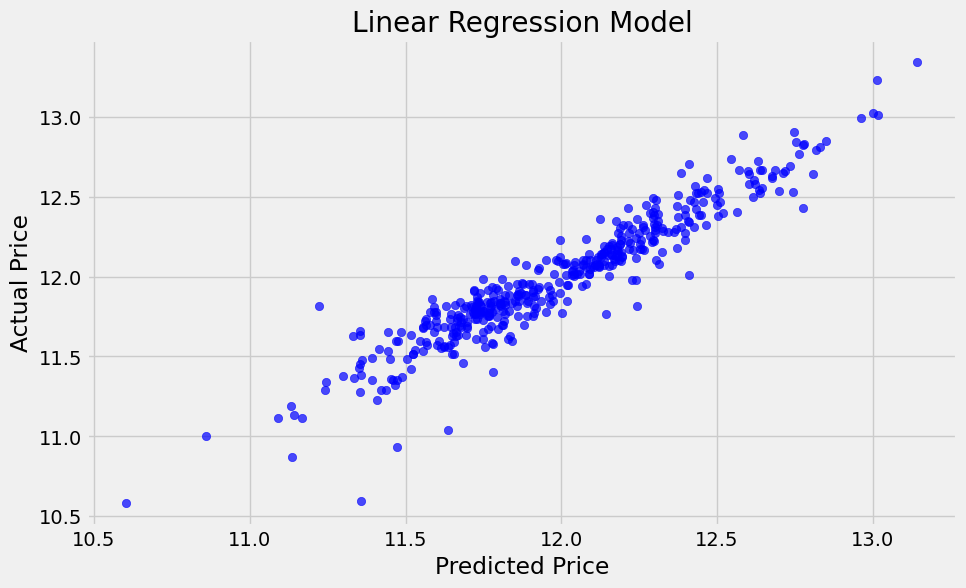

In [453]:
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

Text(0.5, 1.0, 'Linear Regression Model using Hypertuning (Lasso)')

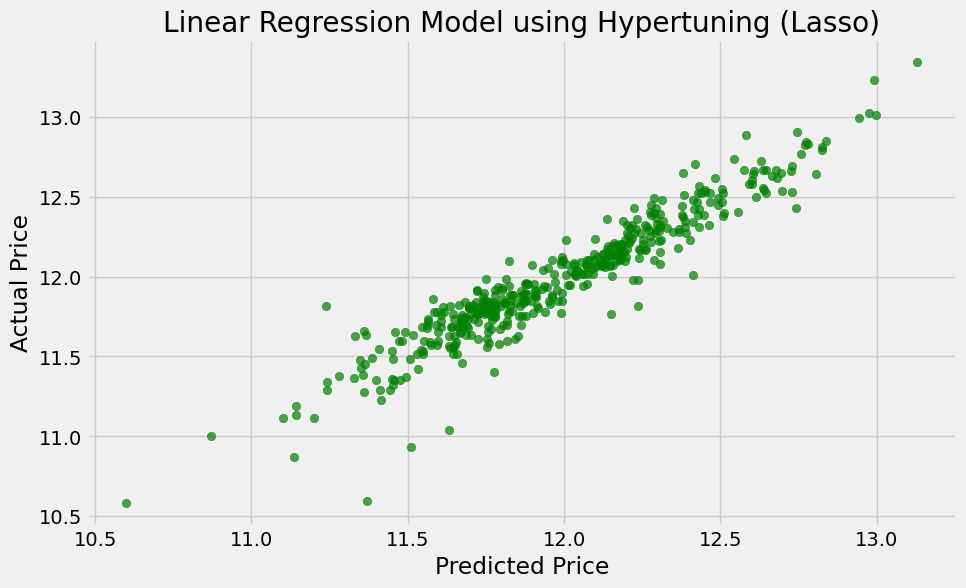

In [454]:
plt.scatter(y_pred_lasso, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model using Hypertuning (Lasso)')

Actually there is no huge different between before and after using Hypertuning, so I just using the Original one

## Submission (Additional)

In [455]:
submission = pd.DataFrame()
submission['Id'] = test['Id'].astype(int)

In [456]:
temp = test.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()

In [457]:
predictions = model.predict(temp)

In [458]:
predictions = np.exp(predictions)
submission['SalePrice'] = predictions

In [459]:
submission.to_csv('submission.csv', index = False)

Just additional information when I submit the 'submission.csv' file to the Kaggle Competition, I got ranked 3383 with the score "Score: 22.26176" The less score you got means more accurate the model to predict the house prices.

## Conclusion

### General Insights

<ol>
    <li>The most correlated features to sale price were the overall quality score (79%), above-ground living area (71%), garage area (64%), and number-of-car garage (62%).</li>
    <li>The most uncorrelated features to sale price were MSSubClass      (-0.084284), EnclosedPorch   (-0.128578), KitchenAbvGr    (-0.135907)</li>
</ol>

### Insights from the Scatter Plot
<ol>
    <li>The plot shows a strong linear relationship between actual prices and predicted prices.</li>
    <li>Most points are aligned closely to the diagonal, which indicates a good prediction performance.</li>
    <li>There are some minor deviations, suggesting that a few predictions are slightly off, but overall, the model generalizes well.</li>
</ol>

### Interpretation of the Model's Performance

Mean Absolute Error (MAE): 0.0866
This means that, on average, the predicted house prices are off by 8.66% in logarithmic terms.
A lower MAE indicates better model accuracy.



Mean Squared Error (MSE): 0.01697
Since MSE penalizes larger errors more than smaller ones, this suggests that most of the predictions are fairly accurate, with only a few large errors.



Root Mean Squared Error (RMSE): 0.1303
RMSE is slightly higher than MAE because it accounts for larger errors.
Since this value is low, it confirms that the model performs well.

### Closing

My model, I think performs well, with low errors and high accuracy. However I think this is how to improve the model:

<ol>
    <li>Try feature selection to remove irrelevant features.</li>
    <li>Experiment with more complex models like Gradient Boosting or Random Forest. But, because this is a lecture assignment, I must use Linear Regression to make the model.</li>
    <li>Improve by using the Tune Hyperparameter (find the best parameter)</li>
</ol>